# Flow, Paths and Limit Cycles 

First read some libraries needed. 


In [10]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

## Routine to create the phase diagram
last time we made some function to create phase diagram. Since we will use them here as well.

In [11]:
def plot_flow(ax,rhs,xrange=[-2.5,2.5],yrange=[-2.5,2.5],xnum=100,ynum=100,nullclines=False):

    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0,np.array([uu[i,j], vv[i,j]]))


# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
# def plot_solution(ax,rhs,y0,t_end,t_dim=2000,color='green',init_pt=True,linewidth=2.5):

#     t = np.linspace(0, t_end, t_dim)
#     X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t)
#     x,y=X.y
#     t=X.t
#     ax.plot(x,y, color=color,linewidth=linewidth)
#     if (init_pt):
#         ax=plot_point(ax,y0,color=color)
#     return ax

def get_solution(rhs, y0, t_end, t_dim=2000):
    t = np.linspace(0, t_end, t_dim)
    sol = sc.integrate.solve_ivp(rhs, t_span=[t[0], t[-1]], y0=y0, t_eval=t)
    return sol

def plot_solution(ax, rhs, y0, t_end, t_dim=2000, color='green', init_pt=True, linewidth=2.5, linestyle='-'):
    sol = get_solution(rhs, y0, t_end, t_dim)
    x, y = sol.y
    ax.plot(x, y, color=color, linewidth=linewidth,linestyle=linestyle)
    if init_pt:
        ax = plot_point(ax, y0, color=color)
    return ax

def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



# A nonlinear example 
We will use
$$
\begin{array}{rl}
 \dot{x}(t) = & y \\[0.5pt]
 \dot{y}(t) = & x(1-x^2)-y
\end{array}
$$
as an example. 

### Linear analysis (analytical)
Isocline: $\dot{x}$ is zero when $y=0$. 

Isocline:  $\dot{y}$ is zero when $y=x(1-x^2)=x(1-x)(1+x)$.  

Hence, equilibrium points at $(x,y)=(0,0)$ (saddle point), $(x,y)=(1,0)$ and $(x,y)=(-1,0)$ (both stable spirals).

<span style="color:red"> Check this! </span>

Let's plot the flow and the isoclines, see that the isoclines cross each other at the right places.





In [12]:
def rhs(t,xy):
    x,y=xy
    dx=y
    dy=x*(1-x**2)-y
    return [dx,dy]

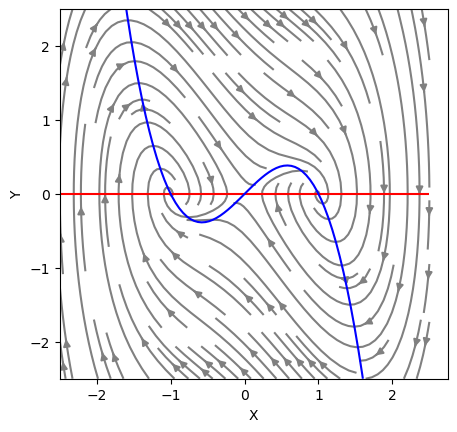

In [13]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)



## Numerical linear analysis
From the previous figure, it looks like we have fixed points at (-1,0), (0,0) and (1,0). We have found this already. Can we do the analysis through numerics? 

Defining some functions.

In [14]:
def jacobian(rhs, xy, eps=1e-8):
    """
    Compute the Jacobian matrix of a system of differential equations at a given point.
    Parameters:
    rhs (function): The right-hand side function of the differential equations. It should take two arguments: time (t) and state (xy).
    xy (array-like): The point (x, y) at which to evaluate the Jacobian.
    eps (float, optional): A small perturbation value for numerical differentiation. Default is 1e-8.
    Returns:
    numpy.ndarray: A 2x2 Jacobian matrix evaluated at the point (x, y).
    Note:
    This function uses finite differences to approximate the partial derivatives.

    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    
    f0 = np.array(rhs(0, xy))
    jac = np.zeros((2, 2))
    
    for i in range(2):
        dxy = np.zeros(2)
        dxy[i] = eps
        f1 = np.array(rhs(0, xy + dxy))
        jac[:, i] = (f1 - f0) / eps
    
    return jac

def eigenvalues_eigenvectors(jac):
    """
    Calculate the eigenvalues and eigenvectors of a given Jacobian matrix.
    Parameters:
    jac (numpy.ndarray): A square matrix representing the Jacobian matrix.
    Returns:
    tuple: A tuple containing two elements:
        - eigenvalues (numpy.ndarray): An array of eigenvalues.
        - eigenvectors (numpy.ndarray): An array of eigenvectors, where each column is an eigenvector corresponding to the eigenvalue at the same index.


    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    eigenvalues, eigenvectors = np.linalg.eig(jac)
    return eigenvalues, eigenvectors


# Example usage
xy = [1, 0]
jac = jacobian(rhs, xy)
print(jac)

# Example usage
eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

print("J:")
pprint(jac)
print()
print("Eigenvalues and Eigenvectors:")
for i in range(len(eigenvalues)):
    pprint(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    pprint(f"Eigenvector {i+1}: {eigenvectors[:, i]}")
    print()


[[ 0.          1.        ]
 [-2.00000001 -1.        ]]
J:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])

Eigenvalues and Eigenvectors:
'Eigenvalue 1: (-0.5+1.3228756584974484j)'
'Eigenvector 1: [-0.20412414-0.54006172j  0.81649658+0.j        ]'

'Eigenvalue 2: (-0.5-1.3228756584974484j)'
'Eigenvector 2: [-0.20412414+0.54006172j  0.81649658-0.j        ]'



<span style="color:cadetblue"> 
Experiment with different epsilon in the call to the Jacobian above. What do you notice?
</span>



### Equilibrium points and linear stability.
Let's find the equilibrium points and do linear stability analysis numerically.


In [15]:
from scipy.optimize import fsolve

# Define the system of equations for equilibrium points. A needed wrapper.
def equilibrium_points(xy):
    return rhs(0, xy)

# Initial guesses for the equilibrium points
initial_guesses = [[0, 0], [1, 0], [-1, 0]]

# Find the equilibrium points
equilibrium_points = [fsolve(equilibrium_points, guess) for guess in initial_guesses]

# Print the equilibrium points
for point in equilibrium_points:
    print(f"Equilibrium point: {point}")

Equilibrium point: [0. 0.]
Equilibrium point: [1. 0.]
Equilibrium point: [-1.  0.]


<span style="color:cadetblue"> 
What happens if the initial guesses are off? 
</span>

### Linear analysis,

In [16]:
for point in equilibrium_points:
    """
    Iterates through a list of equilibrium points, computes the Jacobian matrix at each point,
    and then calculates and prints the eigenvalues and eigenvectors of the Jacobian matrix.
    For each equilibrium point:
    - Computes the Jacobian matrix using the provided `rhs` function.
    - Calculates the eigenvalues and eigenvectors of the Jacobian matrix.
    - Prints the equilibrium point, the Jacobian matrix, and the eigenvalues.
    - If all eigenvalues are real, prints the eigenvectors.
    Args:
        equilibrium_points (list): A list of equilibrium points to analyze.
        rhs (function): The right-hand side function of the differential equations.
        jacobian (function): A function that computes the Jacobian matrix of `rhs` at a given point.
        eigenvalues_eigenvectors (function): A function that computes the eigenvalues and eigenvectors of a matrix.
    Returns:
        None
    """

    jac = jacobian(rhs, point)
    eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
    
    print(f"Equilibrium point: {point}")
    print("Jacobian matrix:")
    pprint(jac)
    print("Eigenvalues:")
    pprint(eigenvalues)
    
    if np.all(np.isreal(eigenvalues)): # Check if eigenvalues are real, if so print the eigenvectors
        print("Eigenvectors:")
        pprint(eigenvectors)
    print()
    print()

Equilibrium point: [0. 0.]
Jacobian matrix:
array([[ 0.,  1.],
       [ 1., -1.]])
Eigenvalues:
array([ 0.61803399, -1.61803399])
Eigenvectors:
array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])


Equilibrium point: [1. 0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])
Eigenvalues:
array([-0.5+1.32287566j, -0.5-1.32287566j])


Equilibrium point: [-1.  0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-1.99999998, -1.        ]])
Eigenvalues:
array([-0.5+1.32287565j, -0.5-1.32287565j])




### Plotting

In [17]:
# Plot the eigenvectors in the phase diagram for the ones with real eigenvalues

def plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['blue', 'green'], legend=True, zoom_range=2):
    """
    Plots the phase diagram with eigenvectors for a given dynamical system.
    Parameters:
    ax (matplotlib.axes.Axes): The matplotlib axes object where the plot will be drawn.
    rhs (function): The right-hand side function of the dynamical system.
    equilibrium_points (list of arrays): List of equilibrium points of the system.
    colors (list of str, optional): List of colors for the eigenvectors. Defaults to ['blue', 'green'].
    legend (bool, optional): Whether to display the legend. Defaults to True.
    zoom_range (float, optional): The range for the x and y axes. Defaults to 2.
    Returns:
    matplotlib.axes.Axes: The matplotlib axes object with the plot.
    """

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    # Plot the flow
    ax = plot_flow(ax, rhs, nullclines=False, xrange=[-zoom_range, zoom_range], yrange=[-zoom_range, zoom_range])

    # Plot the eigenvectors for the equilibrium points with real eigenvalues
    for point in equilibrium_points:
        jac = jacobian(rhs, point)
        eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

        if np.all(np.isreal(eigenvalues)):
            for i in range(len(eigenvalues)):
                eigenvector = eigenvectors[:, i]
                start_point = point
                end_point = point + eigenvector

                ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f'Eigenvector {i+1}', linewidth=2.5, color=colors[i % len(colors)])
                ax.plot([start_point[0], -end_point[0]], [start_point[1], -end_point[1]], linewidth=2.5, color=colors[i % len(colors)])

    if legend:  
        ax.legend(loc='upper right')
    # Plot the equilibrium points
    for point in equilibrium_points:
        ax = plot_point(ax, point, color='red')
    ax.set_xlim(-zoom_range,zoom_range)
    ax.set_ylim(-zoom_range,zoom_range)
    return ax


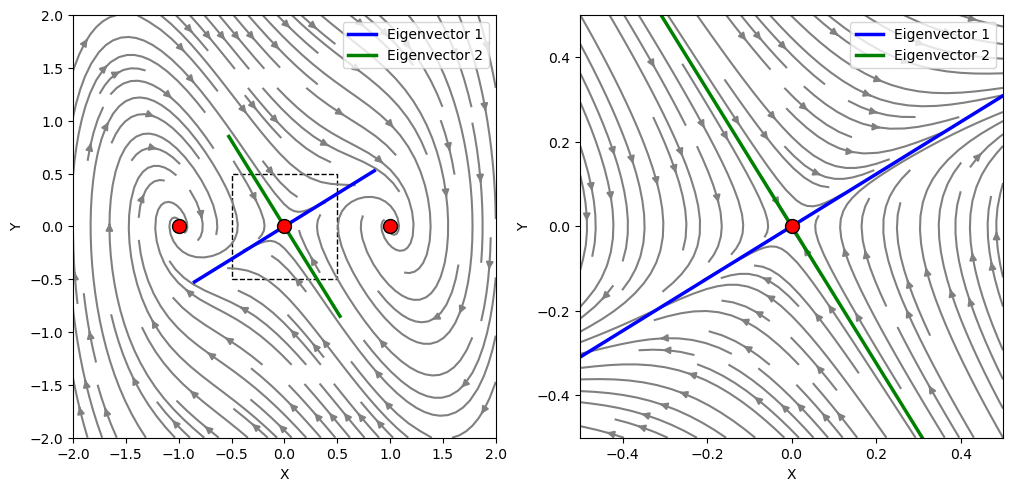

In [29]:

# Call the function
"""
This code creates a figure with two subplots to visualize phase diagrams with eigenvectors.
It performs the following steps:
1. Creates a figure with two subplots arranged in a single row.
2. Sets the size of the figure to 12 inches by 6 inches.
3. Defines a zoom range for the second subplot.
4. Plots the phase diagram with eigenvectors on the first subplot.
5. Plots the phase diagram with eigenvectors on the second subplot with a specified zoom range.
6. Draws a square on the first subplot to indicate the zoomed-in area shown in the second subplot.
7. Displays the figure.
"""
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
zoom_range=0.5
ax[0] = plot_eigenvectors_phase_diagram(ax[0], rhs, equilibrium_points)
ax[1] = plot_eigenvectors_phase_diagram(ax[1], rhs, equilibrium_points,zoom_range=zoom_range)

# Draw a square in ax[0] based on the zoom_range in ax[1]
square_range = zoom_range
square = plt.Rectangle((-square_range, -square_range), 2*square_range, 2*square_range, fill=False, color='black', linestyle='--')
ax[0].add_patch(square)
plt.show()



<span style="color:cadetblue"> 
What do you notice?
</span>

# Some definitions

## Definition of **flow** (Definition 2 on p 118) 
A _flow_ is a mapping $\pi: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ such that: 
1. $\pi$ is continuous
2. $\pi(\bf{x},0)=\bf{x} \ \forall \ \bf{x}\in \mathbb{R}^2$
3. $\pi(\pi(\bf{x},t_1),t_2)=\pi(\bf{x},t_1+t_2)$

## Definition of Trajectories or orbits (Definition 3 on p 118)
Suppose $I_{\bf{x}}$ is the maximal interval of existence. 
A trajectory through $\bf{x}$ is defined as 
$$
\gamma(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}}
$$


- Positive *semi-orbit* is defined: $\gamma^+(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t>0}$
- Negative *semi-orbit* is defined: $\gamma^-(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t<0}$

# Our example
Lets plot some solutions

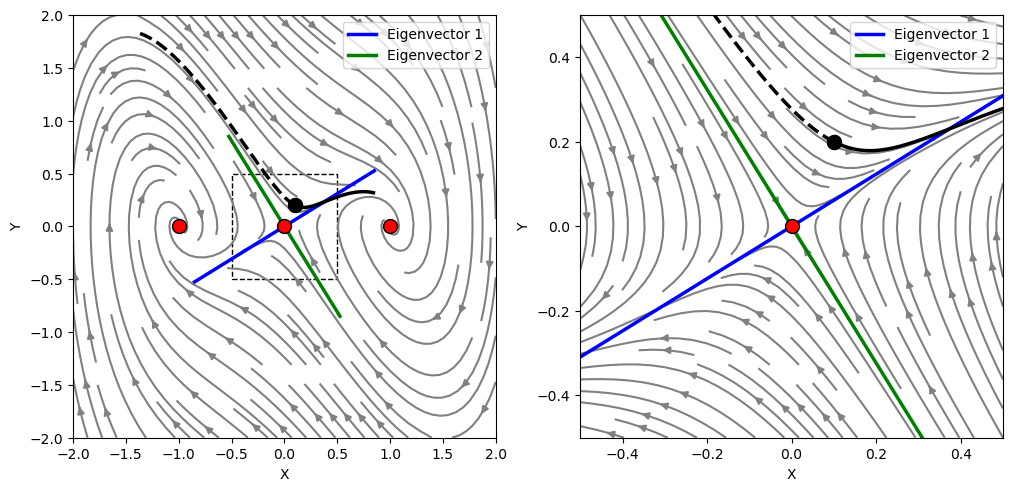

In [30]:
y0=[0.1,0.2]
ax[0]=plot_solution(ax[0],rhs,y0,t_end=3,color='black', linestyle='-') 
ax[0]=plot_solution(ax[0],rhs,y0,t_end=-2,color='black', linestyle='--')
ax[1]=plot_solution(ax[1],rhs,y0,t_end=3,color='black', linestyle='-')
ax[1]=plot_solution(ax[1],rhs,y0,t_end=-2,color='black', linestyle='--')
plt.show()
fig

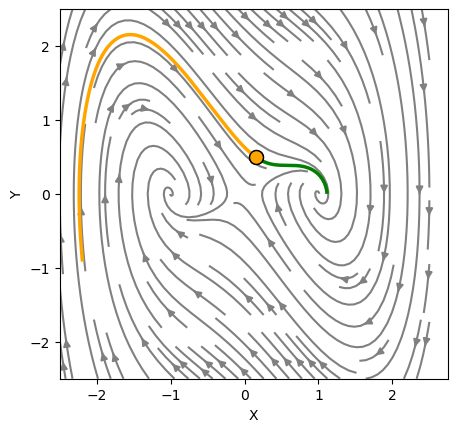

In [31]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=False)

# Change y0 below to see different solutions.
y0=[0.15,0.5]
ax=plot_solution(ax,rhs,y0,t_end=3,color='green')
ax=plot_solution(ax,rhs,y0,t_end=-2,color='orange')




The orange path is by going backward in time. 

## Definition of limit sets (Definition 4 on p 118)
- The positive limit set of a point $\bf{x}$
$$
\Gamma^+ (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$
- The negative limit set of a point $\bf{x}$
$$
\Gamma^- (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow - \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$

In phase plane: critical points, closed orbits, or infinity. 

### Invariant sets
A set $S$ is *invariant* with respect to a flow if $\bf{x}\subset S$ implies that $\gamma(\bf{x})\subset S$.

Our example has two stable spirals and one unstable saddle point. 



## Basins of attractions
Remember that the origin for our example is a saddle point. Let's plot the solutions with initial conditions close to origin along the eigenvectors. 

In [32]:
xy = [0, 0]
jac = jacobian(rhs, xy)

eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [ 0.61803399 -1.61803399]
Eigenvectors:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


(-2.0, 2.0)

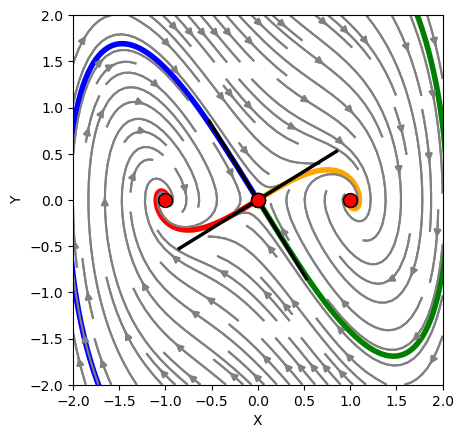

In [33]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
eps=1.e-8
zoom_range=2
xrange=[-zoom_range,zoom_range]
yrange=[-zoom_range,zoom_range]
ax=plot_flow(ax,rhs,xrange=xrange,yrange=yrange,nullclines=False)

y0=[0,0]+eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='orange', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='red', linewidth=4)
y0=[0,0]+eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, color='blue', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, linewidth=4)
ax = plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['black', 'black'], legend=False, zoom_range=zoom_range)
ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])   

<span style="color:cadetblue"> 
Increase the zoom_range in the cell above, what do you notice? 

Do we have any limit sets and invariant sets?
</span>

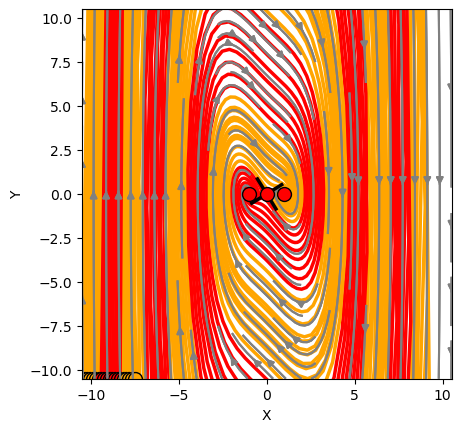

In [34]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
zoom_range=10.5
xrange=[-zoom_range,zoom_range]
yrange=[-zoom_range,zoom_range]
initial_x_values = np.linspace(xrange[0], xrange[0] + 3, 20)
initial_y_value = yrange[0]

for x_val in initial_x_values:
    y0 = [x_val, initial_y_value]
    sol = sc.integrate.solve_ivp(rhs, t_span=[0, 100], y0=y0, t_eval=np.linspace(0, 100, 1000))
    end_point = sol.y[:, -1]
    
    distance_to_1_0 = np.linalg.norm(end_point - np.array([1, 0]))
    distance_to_neg1_0 = np.linalg.norm(end_point - np.array([-1, 0]))
    
    if distance_to_1_0 < distance_to_neg1_0:
        color = 'orange'
    else:
        color = 'red'
    
    ax = plot_solution(ax, rhs, y0, t_end=100, color=color)


ax=plot_flow(ax,rhs,xrange=xrange,yrange=yrange,nullclines=False)
ax = plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['black', 'black'], legend=False, zoom_range=zoom_range)
ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])
plt.show()


# Limit cycles
Lets define three new examples

In [24]:

def holling_tanner(t,X):
    # here X[0] = x and X[1] = y
    return np.array([X[0] * (1 - X[0]/7) - 6 * X[0] * X[1] / (7 + 7*X[0]),
                    0.2 * X[1] * (1 - 0.5 * X[1] / X[0])])


#Here we see an example of giving parameters, with default values, to a function
def Fitzhugh_Nagumo(t,x,theta = 0.14, omega = 0.112, gamma = 2.54, epsilon = 0.01):
    return [-x[0] * (x[0] - theta) * (x[0] - 1) - x[1] + omega,
            epsilon * (x[0] - gamma * x[1])]

def pendulum(t,x,l=1,g=9.8):
    return np.array([x[1],-np.sin(x[0])])



### The pendulum

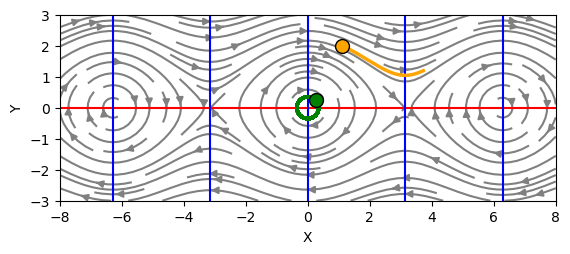

In [45]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,pendulum,xrange=[-8,8],yrange=[-3,3],nullclines=True)
ax=plot_solution(ax,pendulum,[0.25,0.25],t_end=200)
ax=plot_solution(ax,pendulum,[1.1,2],t_end=2,color='orange')





**Can you draw the solutions going from $(-\pi,0)$ to $(\pi,0)$?**


### Holling Tanner

The Holling-Tanner equations are given by:
$$
\begin{aligned}
\dot{x} &= x \left(1 - \frac{x}{7}\right) - \frac{6x y}{7 + 7x} \\
\dot{y} &= 0.2 y \left(1 - \frac{0.5 y}{x}\right)
\end{aligned}
$$
where $x$ is the prey population and $y$ is the predator population.

The Holling-Tanner model describes predator-prey dynamics with nonlinear interactions. The prey population ($x$) grows logistically, limited by carrying capacity, and is consumed by predators ($y$) at a rate that saturates for large prey populations (a Holling type II functional response). The predator population grows proportionally to its current size and the availability of prey, but is also limited by its own density. This system can exhibit stable equilibria, oscillations, or limit cycles, depending on parameter values, and is widely used to study ecological stability and population cycles.

**Equilibrium point:** The system has a non-trivial equilibrium at approximately $(x^*, y^*) = (1, 1)$, where both prey and predator populations are constant. This can be found by solving $\dot{x} = 0$ and $\dot{y} = 0$ simultaneously. For the parameters given, $(1, 1)$ is a biologically relevant steady state.

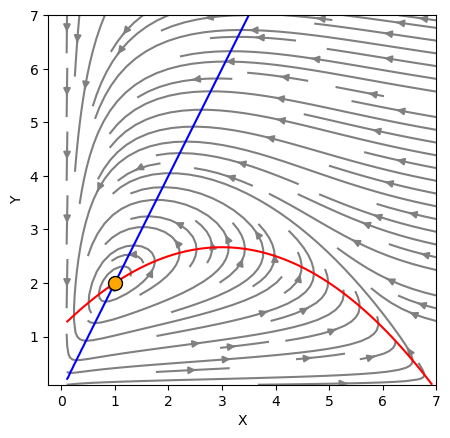

In [49]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,holling_tanner,xrange=[0.1,7],yrange=[0.1,7],nullclines=True)
ax=plot_solution(ax,holling_tanner,[1.,2],t_end=200,color='orange')
#ax=plot_solution(ax,holling_tanner,[0.25,0.25],t_end=200)


### Definition *limit cycle* (Definition 6 on p 188)
A limit cycle, $\Gamma$, is 
- a stable limit cycle if $\Lambda^+(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are attracted to the limit cycle.
- an stable limit cycle if $\Lambda^-(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are repelled from the limit cycle.
- a semi-stable limit cycle if it's attracting on one side and repelling on the other side. 

### Definition period of a limit cycle (Definition 7 on p 119)
is given by the minimum $T$ so that $\bf{x}(t+T)=\bf{x}(t)$.

--- 

See *Example 1* on page 119.



![Skjermbilde 2024-01-22 kl. 06.07.39.png](<attachment:Skjermbilde 2024-01-22 kl. 06.07.39.png>)
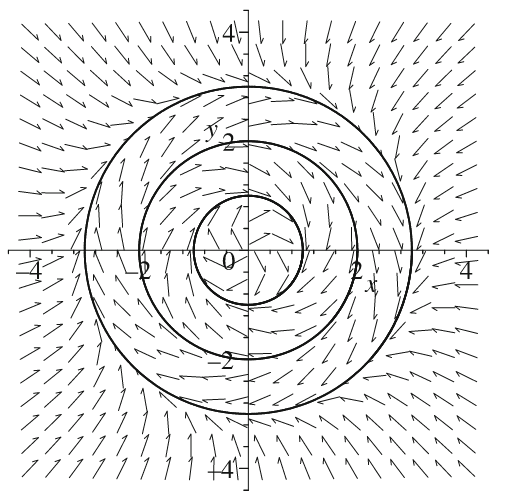

# Theorems on the existence of closed orbits
### Poincaré-Bendixson theorem
Suppose that $\gamma^+$ is contained in a bounded region in which there are finitely many critical points. Then $\Gamma^+(\gamma)$ is either:
- a single critical point
- a single closed orbit
- a graphic- critical points joined by heteroclinic orbits.

A heteroclinic orbit connects to separate critical points and takes an infinite time to make the connection. 

### Corollary 
Let $D$ be a bounded closed set containing no critical points and suppose that $D$ is positively invariant. Then there exists a limit cycle contained in D. 

### Example 2 p 121
$$
\begin{array}{rl}
\dot{x}=&y-8x^3 \\
\dot{y}=&2y-4x-2y^3
\end{array}
$$

(-1.5, 1.5)

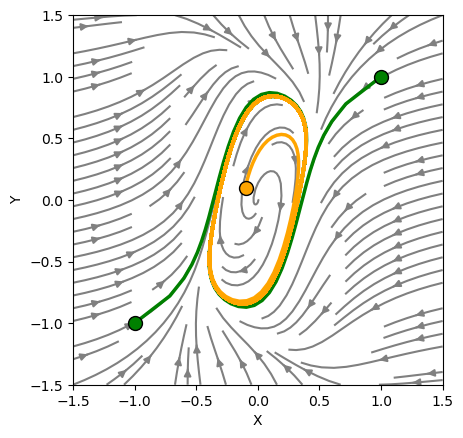

In [50]:
### Example 
def ex2p121(t,X,l=1,g=9.8):
    x,y=X
    dx=y-8*x**3
    dy=2*y-4*x-2*y**3
    return np.array([dx,dy])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

xymax=1.5

ax=plot_flow(ax,ex2p121,xrange=[-xymax,xymax],yrange=[-xymax,xymax],nullclines=False)
y0=[1,1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-1,-1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-0.1,0.1]
ax=plot_solution(ax,ex2p121,y0,t_end=150,color='orange')
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)

### Dulacs Criterion
Consider an annular region, $A$ contained in an open set $E$. If 
$$
\nabla \cdot (\psi \bf{X}) 
$$
does not change sign in $A$, where $\psi$ is continuously differentiable, then there is at most one limit cycle entirely contained in A. 

---

Do examples 3 and 4 on pages 122-123.

### Bendixson criterion, Non existence of limit cycles in the plane 
See Theorem on P123.
